# Third approach (Combine weight with height = BMI) and use it as a categorical output

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)


# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Categorize BMI
'''
classification ranges defined by health organizations such as the World Health
Organization (WHO) and the Centers for Disease Control and Prevention (CDC).

These ranges are:
Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity I: 30 ≤ BMI < 34.9
Obesity II: 35 ≤ BMI < 39.9
Obesity III: BMI ≥ 40

'''
bmi_bins = [0, 18.5, 24.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data_encoded['BMI_Category'] = pd.cut(data_encoded['BMI'], bins=bmi_bins, labels=bmi_labels)

# Drop the original BMI column
data_encoded = data_encoded.drop(columns=['BMI'])



# Define the features (X) and the target (y)
data_encoded = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])

# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']
X.head()


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,21.0,True,False,2.0,3.0,False,2.0,False,0.0,...,0,1,0,0,0,1,0,0,1,0
1,False,21.0,True,False,3.0,3.0,True,3.0,True,3.0,...,0,1,0,0,1,0,0,0,1,0
2,True,23.0,True,False,2.0,3.0,False,2.0,False,2.0,...,0,1,0,1,0,0,0,0,1,0
3,True,27.0,False,False,3.0,3.0,False,2.0,False,2.0,...,0,1,0,1,0,0,0,0,0,1
4,True,22.0,False,False,2.0,1.0,False,2.0,False,0.0,...,0,1,0,0,1,0,0,0,1,0


## Decision tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                precision    recall  f1-score   support

Normal weight       0.49      0.43      0.46        67
        Obese       0.96      0.95      0.96        58
   Overweight       0.87      0.88      0.87       244
  Underweight       0.77      0.85      0.81        54

     accuracy                           0.81       423
    macro avg       0.77      0.78      0.77       423
 weighted avg       0.81      0.81      0.81       423

Accuracy: 0.8132387706855791


{'Normal weight': {'precision': 0.4915254237288136,
  'recall': 0.43283582089552236,
  'f1-score': 0.46031746031746035,
  'support': 67},
 'Obese': {'precision': 0.9649122807017544,
  'recall': 0.9482758620689655,
  'f1-score': 0.9565217391304347,
  'support': 58},
 'Overweight': {'precision': 0.8663967611336032,
  'recall': 0.8770491803278688,
  'f1-score': 0.8716904276985743,
  'support': 244},
 'Underweight': {'precision': 0.7666666666666667,
  'recall': 0.8518518518518519,
  'f1-score': 0.8070175438596491,
  'support': 54},
 'accuracy': 0.8132387706855791,
 'macro avg': {'precision': 0.7723752830577094,
  'recall': 0.7775031787860522,
  'f1-score': 0.7738867927515296,
  'support': 423},
 'weighted avg': {'precision': 0.8077965139175685,
  'recall': 0.8132387706855791,
  'f1-score': 0.8099076653373717,
  'support': 423}}

### Counterfactuals

In [ ]:
# Function to generate counterfactuals
def generate_counterfactual(instance, model, original_class, target_class, binary_columns):
    counterfactual = instance.copy()
    for feature in X.columns:
        original_value = instance[feature]
        if feature in binary_columns:
            counterfactual[feature] = not original_value  # Flip the boolean value
        else:
            for change in [-0.1, 0.1]:  # Adjusting feature value slightly
                counterfactual[feature] = original_value + change
                new_prediction = model.predict([counterfactual])
                if new_prediction == target_class:
                    return counterfactual
            # Reset to original value if no change succeeded
            counterfactual[feature] = original_value
    return None

# Choose an instance from the test set
instance_index = 100  # Change this index to select a different instance
instance = X_test.iloc[instance_index]
original_class = y_test.iloc[instance_index]

# Generate counterfactual for the selected instance
target_class = 'Normal weight'  # Change this to the desired target class
counterfactual = generate_counterfactual(instance, dt_classifier, original_class, target_class, binary_columns)

print(f"Original instance:\n{instance}")
print(f"Original class: {original_class}")
if counterfactual is not None:
    print(f"Counterfactual instance:\n{counterfactual}")
else:
    print("No counterfactual instance found that changes the class to the target class.")

Original instance:
Gender                                 True
Age                               20.975973
family_history_with_overweight         True
FAVC                                   True
FCVC                                    2.0
NCP                                     3.0
SMOKE                                 False
CH2O                               1.025275
SCC                                   False
FAF                                 0.00203
TUE                                0.175587
CAEC_Frequently                       False
CAEC_Sometimes                         True
CAEC_no                               False
CALC_Frequently                       False
CALC_Sometimes                         True
CALC_no                               False
MTRANS_Bike                           False
MTRANS_Motorbike                      False
MTRANS_Public_Transportation           True
MTRANS_Walking                        False
Name: 1452, dtype: object
Original class: Overweight
Coun

In [ ]:
# CHANGING ONLY FEATURES THAT CAN BE CHANGE IN REAL LIFE

# List of modifiable features
modifiable_features = [col for col in X.columns if col not in ['Gender', 'family_history_with_overweight', 'Age']]

# Function to generate counterfactuals considering only modifiable features
def generate_counterfactual(instance, model, original_class, target_class, binary_columns, modifiable_features):
    counterfactual = instance.copy()
    for feature in modifiable_features:
        original_value = instance[feature]
        if feature in binary_columns:
            counterfactual[feature] = not original_value  # Flip the boolean value
        else:
            for change in [-0.1, 0.1]:  # Adjusting feature value slightly
                counterfactual[feature] = original_value + change
                new_prediction = model.predict([counterfactual])
                if new_prediction == target_class:
                    return counterfactual
            # Reset to original value if no change succeeded
            counterfactual[feature] = original_value
    return None

# Choose an instance from the test set
instance_index = 100  # Change this index to select a different instance
instance = X_test.iloc[instance_index]
original_class = y_test.iloc[instance_index]

# Generate counterfactual for the selected instance
target_class = 'Normal weight'  # Change this to the desired target class
counterfactual = generate_counterfactual(instance, dt_classifier, original_class, target_class, binary_columns, modifiable_features)

print(f"Original instance:\n{instance}")
print(f"Original class: {original_class}")
if counterfactual is not None:
    print(f"Counterfactual instance:\n{counterfactual}")
else:
    print("No counterfactual instance found that changes the class to the target class.")

Original instance:
Gender                                 True
Age                               20.975973
family_history_with_overweight         True
FAVC                                   True
FCVC                                    2.0
NCP                                     3.0
SMOKE                                 False
CH2O                               1.025275
SCC                                   False
FAF                                 0.00203
TUE                                0.175587
CAEC_Frequently                       False
CAEC_Sometimes                         True
CAEC_no                               False
CALC_Frequently                       False
CALC_Sometimes                         True
CALC_no                               False
MTRANS_Bike                           False
MTRANS_Motorbike                      False
MTRANS_Public_Transportation           True
MTRANS_Walking                        False
Name: 1452, dtype: object
Original class: Overweight
Coun

we can see FAVC(Do you eat high caloric food frequently?) changed from true to false that it makes sense in order to reduce weight

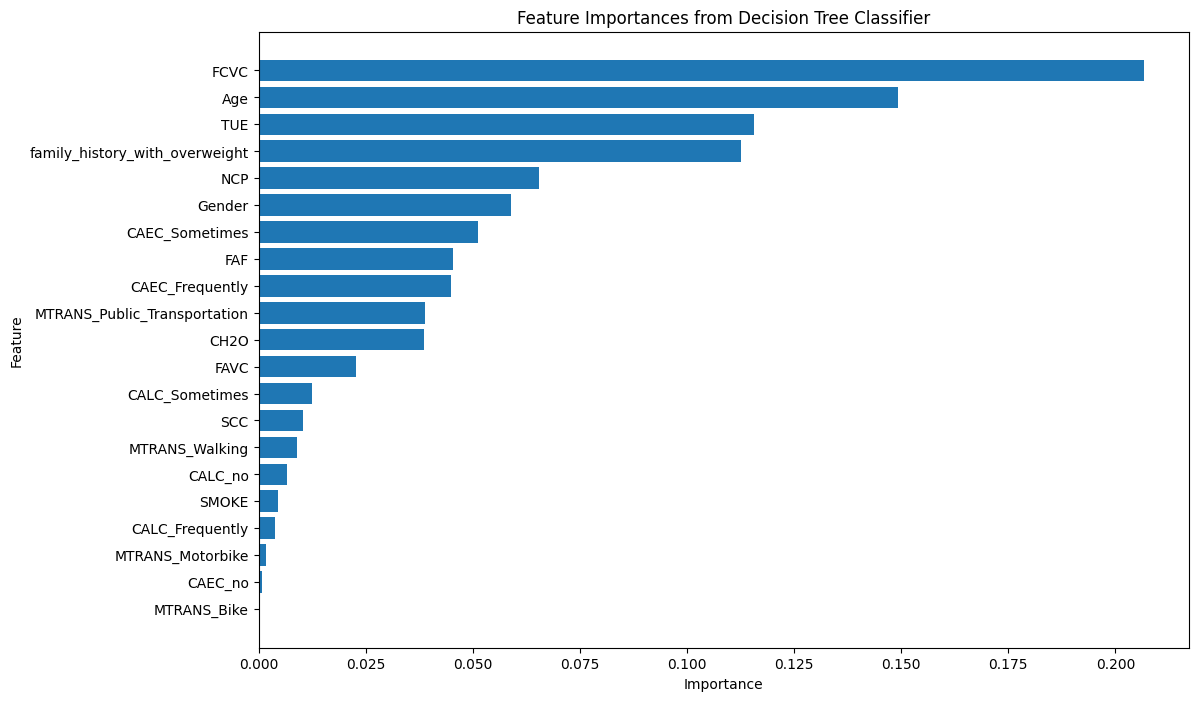

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

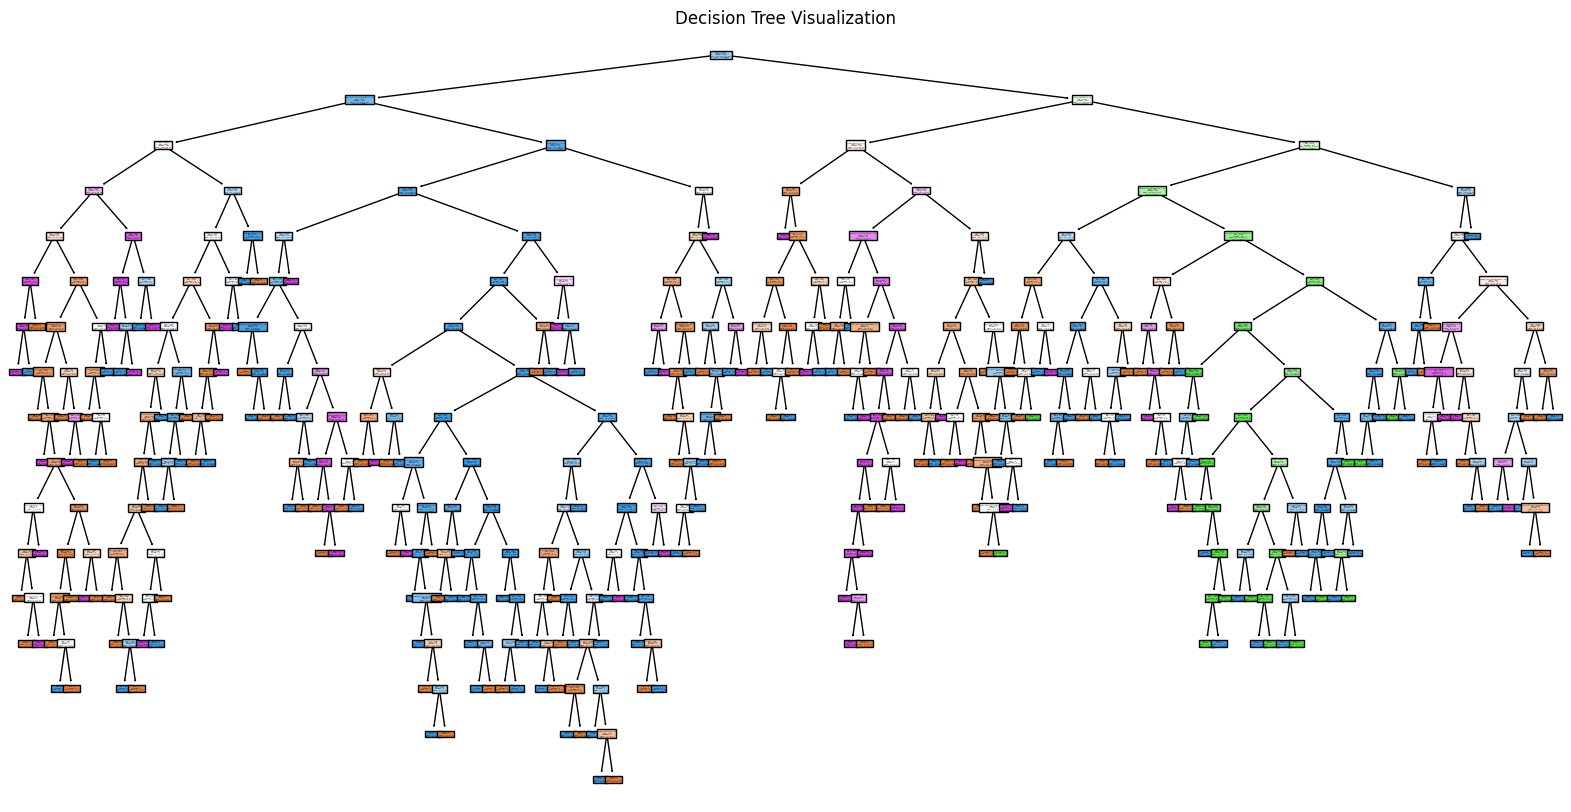

In [ ]:
# Plot the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

## Pruning the Decision Tree

In [ ]:
# Initialize a pruned Decision Tree Classifier with a maximum depth
pruned_dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the pruned model
pruned_dt_classifier.fit(X_train, y_train)

# Make predictions with the pruned model
y_pred_pruned = pruned_dt_classifier.predict(X_test)

# Evaluate the pruned model
classification_report_pruned = classification_report(y_test, y_pred_pruned, output_dict=True)
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
classification_report_pruned

Accuracy: 0.8014184397163121


{'Normal weight': {'precision': 0.5142857142857142,
  'recall': 0.5373134328358209,
  'f1-score': 0.5255474452554744,
  'support': 67},
 'Obese': {'precision': 0.8285714285714286,
  'recall': 1.0,
  'f1-score': 0.90625,
  'support': 58},
 'Overweight': {'precision': 0.8709677419354839,
  'recall': 0.8852459016393442,
  'f1-score': 0.8780487804878049,
  'support': 244},
 'Underweight': {'precision': 0.8285714285714286,
  'recall': 0.5370370370370371,
  'f1-score': 0.651685393258427,
  'support': 54},
 'accuracy': 0.8014184397163121,
 'macro avg': {'precision': 0.7605990783410139,
  'recall': 0.7398990928780506,
  'f1-score': 0.7403829047504265,
  'support': 423},
 'weighted avg': {'precision': 0.8032465056487019,
  'recall': 0.8014184397163121,
  'f1-score': 0.7971846158560194,
  'support': 423}}

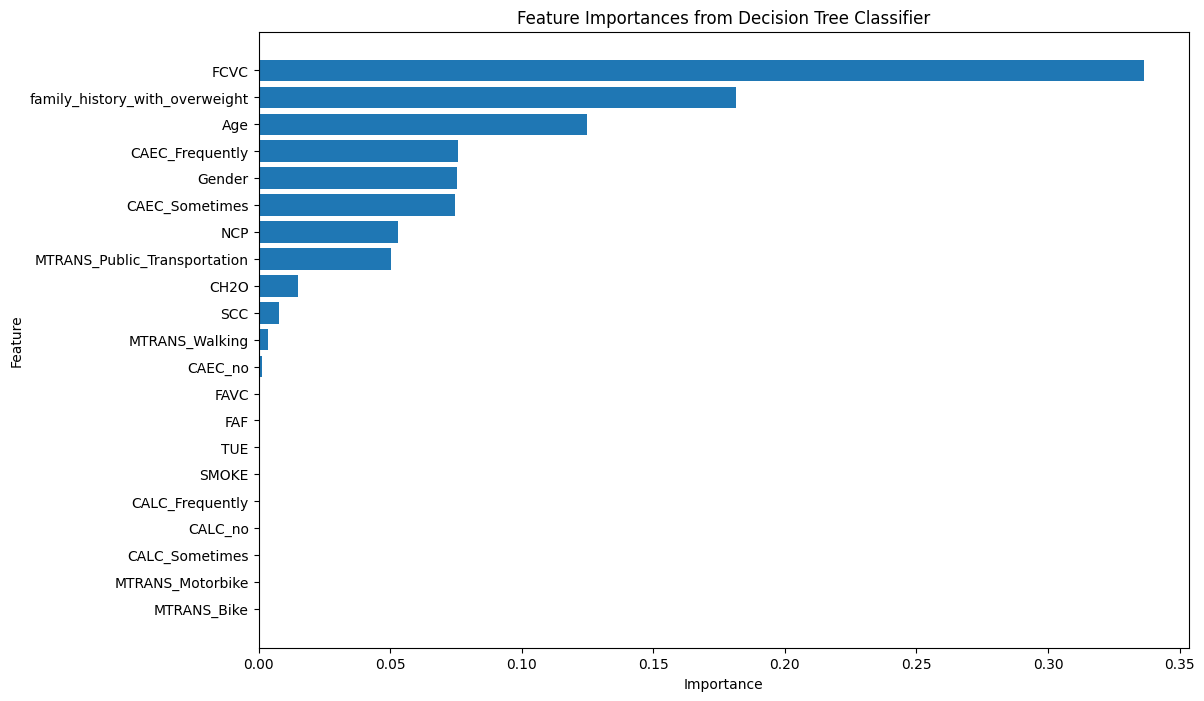

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = pruned_dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

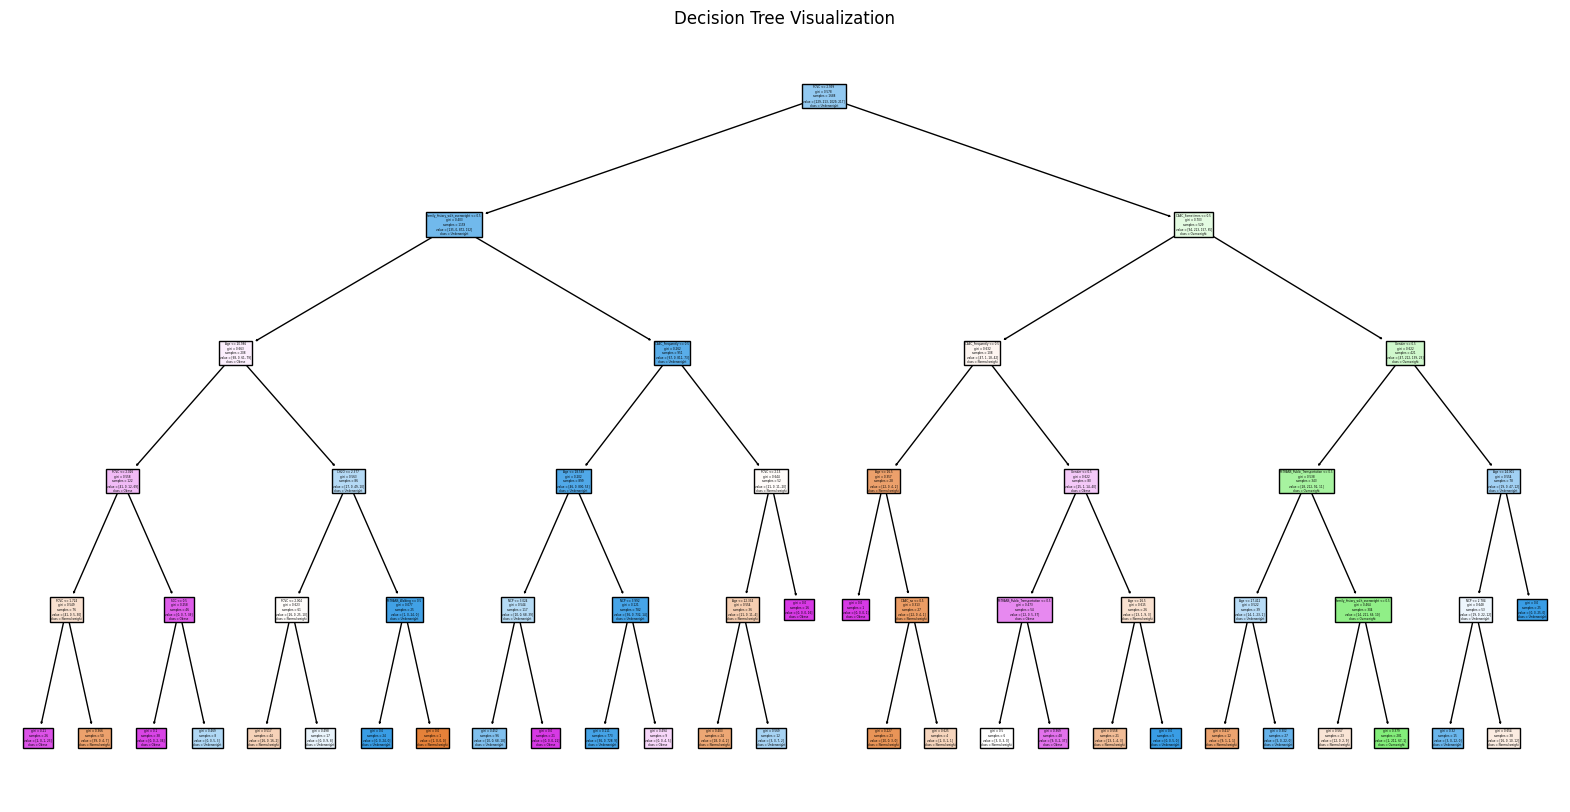

In [ ]:
# Plot the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

## Random Forest

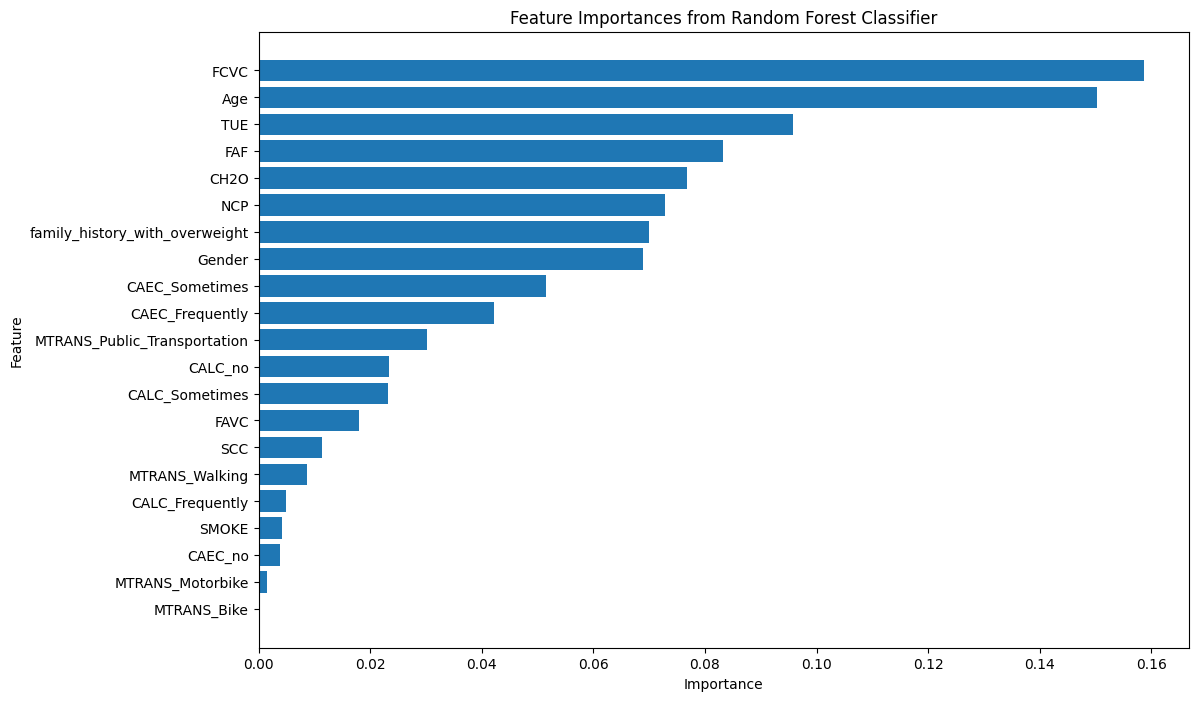

Accuracy: 0.8865248226950354


{'Normal weight': {'precision': 0.7413793103448276,
  'recall': 0.6417910447761194,
  'f1-score': 0.688,
  'support': 67},
 'Obese': {'precision': 0.9818181818181818,
  'recall': 0.9310344827586207,
  'f1-score': 0.9557522123893805,
  'support': 58},
 'Overweight': {'precision': 0.8984375,
  'recall': 0.9426229508196722,
  'f1-score': 0.92,
  'support': 244},
 'Underweight': {'precision': 0.8888888888888888,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54},
 'accuracy': 0.8865248226950354,
 'macro avg': {'precision': 0.8776309702629745,
  'recall': 0.8510843418108253,
  'f1-score': 0.8631602753195673,
  'support': 423},
 'weighted avg': {'precision': 0.8837745114386714,
  'recall': 0.8865248226950354,
  'f1-score': 0.8841835184836503,
  'support': 423}}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=46, random_state=0, max_depth = 15, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Extract feature importances
rf_feature_importances = rf_classifier.feature_importances_
#
# Create a DataFrame for visualization
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the Random Forest
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Make predictions with the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_report_rf

## Gradient Boosting Model (LightGBM)

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 19
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -2.070008
[LightGBM] [Info] Start training from score -0.494957
[LightGBM] [Info] Start training from score -2.051402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.71      0.63      0.67        67
        Obese       0.98      0.88      0.93        58
   Overweight       0.90      0.93      0.91       244
  Underweight       0.85      0.93      0.88        54

     accuracy                           0.87   

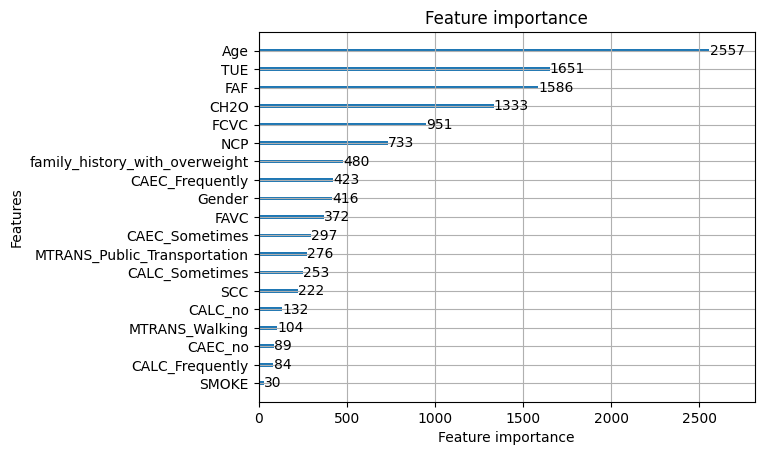

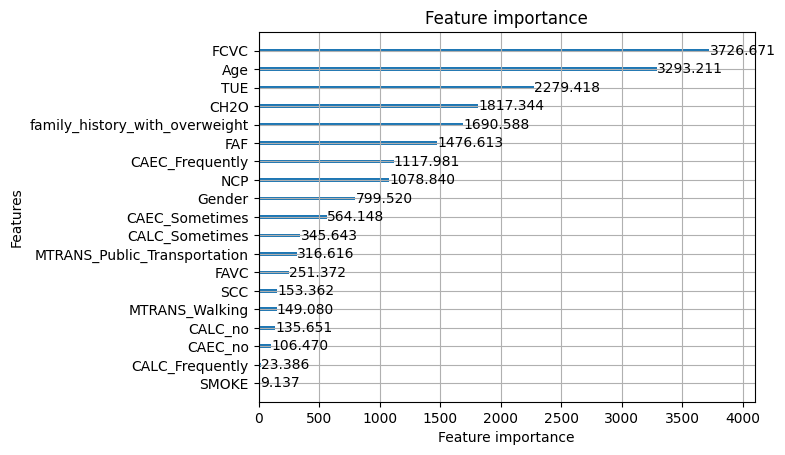

In [ ]:
# Plot feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 19
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -2.070008
[LightGBM] [Info] Start training from score -0.494957
[LightGBM] [Info] Start training from score -2.051402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.71      0.63      0.67        67
        Obese       0.98      0.88      0.93        58
   Overweight       0.90      0.93      0.91       244
  Underweight       0.85      0.93      0.88        54

     accuracy                           0.87       423
    macro avg       0.86      0.84      0.85       423
 

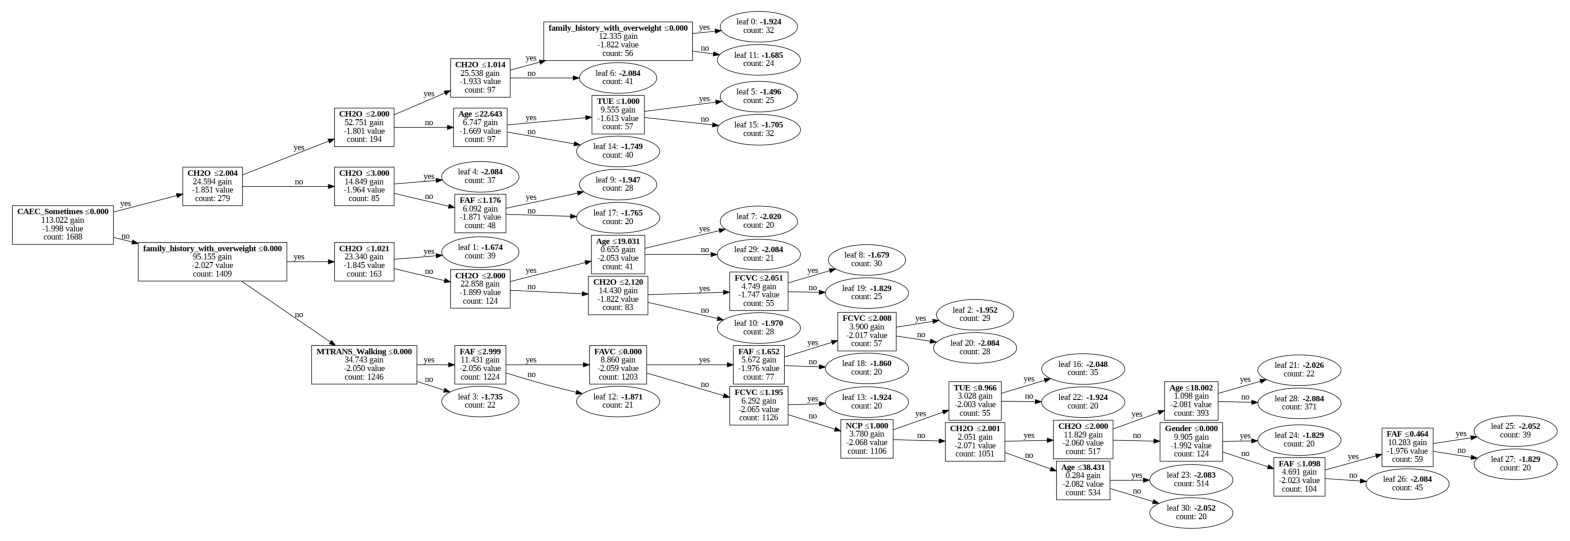

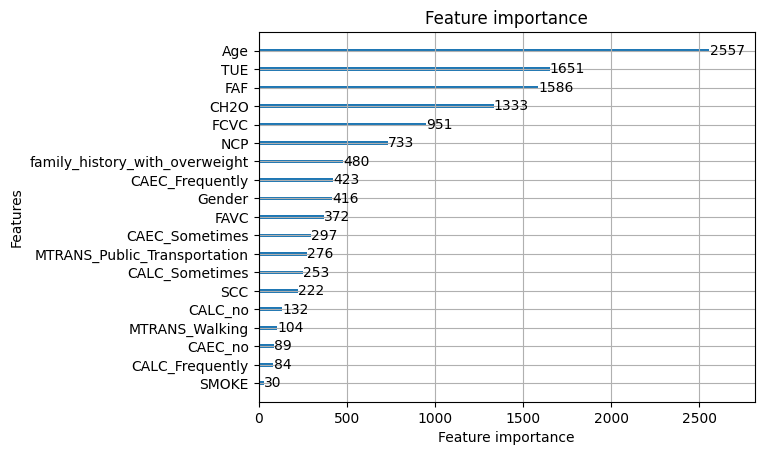

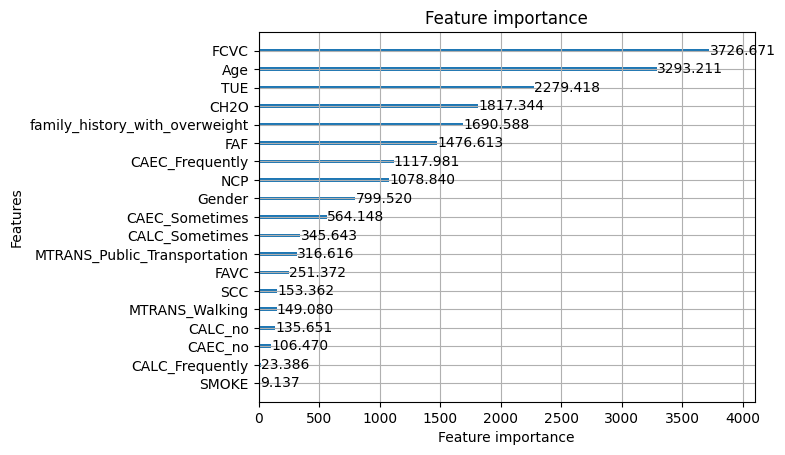

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

# Plot the first tree
fig, ax = plt.subplots(figsize=(20, 10))
lgb.plot_tree(lgb_classifier, tree_index=0, ax=ax, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

# Plot the feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

## Rule filt

In [ ]:
!pip install git+https://github.com/christophM/rulefit.git

  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-req-build-_hgcfw43
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-req-build-_hgcfw43
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done
  Created wheel for RuleFit: filename=RuleFit-0.3-py3-none-any.whl size=8083 sha256=8ffa53f60b2299a6117254cfa306c6c63c2980a9eb5f7b4d92da7e9dc39afea7
  Stored in directory: /tmp/pip-ephem-wheel-cache-qwm64eug/wheels/d6/cf/9c/8838db2e27ac18c3002e2e2fcaa90b2210f681e60ad529e613
Successfully built RuleFit


In [ ]:
one_hot_columns = [ 'BMI_Category']
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)
data_encoded

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI_Category_Normal weight,BMI_Category_Overweight,BMI_Category_Obese
0,False,21.000000,True,False,2.0,3.0,False,2.000000,False,0.000000,...,0,0,1,0,0,1,0,1,0,0
1,False,21.000000,True,False,3.0,3.0,True,3.000000,True,3.000000,...,0,1,0,0,0,1,0,1,0,0
2,True,23.000000,True,False,2.0,3.0,False,2.000000,False,2.000000,...,1,0,0,0,0,1,0,1,0,0
3,True,27.000000,False,False,3.0,3.0,False,2.000000,False,2.000000,...,1,0,0,0,0,0,1,0,1,0
4,True,22.000000,False,False,2.0,1.0,False,2.000000,False,0.000000,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,20.976842,True,True,3.0,3.0,False,1.728139,False,1.676269,...,0,1,0,0,0,1,0,0,0,1
2107,False,21.982942,True,True,3.0,3.0,False,2.005130,False,1.341390,...,0,1,0,0,0,1,0,0,0,1
2108,False,22.524036,True,True,3.0,3.0,False,2.054193,False,1.414209,...,0,1,0,0,0,1,0,0,0,1
2109,False,24.361936,True,True,3.0,3.0,False,2.852339,False,1.139107,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# from rulefit import RuleFit
import numpy as np

# y = data_encoded[['Underweight','BMI_Category_Normal weight','BMI_Category_Overweight','BMI_Category_Obese']].idxmax(axis=1)

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

y

0       Normal weight
1       Normal weight
2       Normal weight
3          Overweight
4          Overweight
            ...      
2106            Obese
2107            Obese
2108            Obese
2109            Obese
2110            Obese
Name: BMI_Category, Length: 2111, dtype: category
Categories (4, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese']

In [ ]:
# Initialize RuleFit with explicit max_iter for LassoCV
rulefit = RuleFit(max_iter=1000)

# Train RuleFit on the dataset
rulefit.fit(X_train.values, y_train)

# Make predictions with the RuleFit model
y_pred_rulefit = rulefit.predict(X_test.values)

# Round and clip predictions to ensure valid class labels
y_pred_rulefit_int = np.round(y_pred_rulefit).astype(int)
y_pred_rulefit_int = np.clip(y_pred_rulefit_int, 0, len(label_encoder.classes_) - 1)

# Evaluate the RuleFit model
print("RuleFit Classification Report:\n", classification_report(y_test, y_pred_rulefit_int))
print("RuleFit Accuracy:", accuracy_score(y_test, y_pred_rulefit_int))

# Decode the numeric labels back to original labels if needed for interpretation
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_rulefit_decoded = label_encoder.inverse_transform(y_pred_rulefit_int)
print("Decoded RuleFit Classification Report:\n", classification_report(y_test_decoded, y_pred_rulefit_decoded))
print("Decoded RuleFit Accuracy:", accuracy_score(y_test_decoded, y_pred_rulefit_decoded))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.101e-02, tolerance: 8.086e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.759e-02, tolerance: 8.086e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e-01, tolerance: 8.086e

RuleFit Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.13      0.22        67
           1       0.44      0.93      0.60        58
           2       0.81      0.85      0.83       244
           3       0.94      0.54      0.68        54

    accuracy                           0.71       423
   macro avg       0.71      0.61      0.58       423
weighted avg       0.75      0.71      0.68       423

RuleFit Accuracy: 0.7092198581560284
Decoded RuleFit Classification Report:
                precision    recall  f1-score   support

Normal weight       0.64      0.13      0.22        67
        Obese       0.44      0.93      0.60        58
   Overweight       0.81      0.85      0.83       244
  Underweight       0.94      0.54      0.68        54

     accuracy                           0.71       423
    macro avg       0.71      0.61      0.58       423
 weighted avg       0.75      0.71      0.68       423

Decoded RuleF

In [ ]:
rules = rulefit.rule_ensemble.rules
rules_df = pd.DataFrame([(rule.__str__(), rule.support, rule.prediction_value) for rule in rules], columns=['rule', 'support', 'prediction_value'])

# Filter out rules with zero prediction values (if necessary)
rules_df = rules_df[rules_df.prediction_value != 0].sort_values(by='prediction_value', ascending=False)

# Display the top rules
print(len(rules_df))

1619


In [ ]:
rules_df.to_csv('rulefit_rules.csv', index=False)

## EBM Model

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.8 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=f8f05438443842decd2fa384923e6cd112471ccb8dd

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Make predictions with the EBM model
y_pred_ebm = ebm.predict(X_test)

# Evaluate the EBM model
print("EBM Classification Report:\n", classification_report(y_test, y_pred_ebm))
print("EBM Accuracy:", accuracy_score(y_test, y_pred_ebm))

EBM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.65      0.58      0.61        67
        Obese       0.96      0.84      0.90        58
   Overweight       0.84      0.91      0.87       244
  Underweight       0.75      0.67      0.71        54

     accuracy                           0.82       423
    macro avg       0.80      0.75      0.77       423
 weighted avg       0.82      0.82      0.81       423

EBM Accuracy: 0.817966903073286


In [ ]:
global_explanation = ebm.explain_global()
importance = []
features = []
print("Global Feature Importances:")
for i, feature in enumerate(global_explanation.data()['names']):
    print(f"{feature}: {global_explanation.data()['scores'][i]}")
    features.append(feature)
    importance.append(global_explanation.data()['scores'][i])

Global Feature Importances:
Gender: 0.46746477003740416
Age: 0.5620016769857796
family_history_with_overweight: 0.42640664964119684
FAVC: 0.10245703119544676
FCVC: 0.7366636498490498
NCP: 0.4289083259219306
SMOKE: 0.03087263660160403
CH2O: 0.3346891959458816
SCC: 0.07182902870844318
FAF: 0.27515162576758595
TUE: 0.4194422294121998
CAEC_Frequently: 0.12948054407128876
CAEC_Sometimes: 0.19874228067243163
CAEC_no: 0.05755428801609778
CALC_Frequently: 0.07995093928334457
CALC_Sometimes: 0.21776899066932395
CALC_no: 0.19345543661048814
MTRANS_Bike: 0.005550078425529168
MTRANS_Motorbike: 0.017601266661147356
MTRANS_Public_Transportation: 0.2542280100287849
MTRANS_Walking: 0.053117532763260464


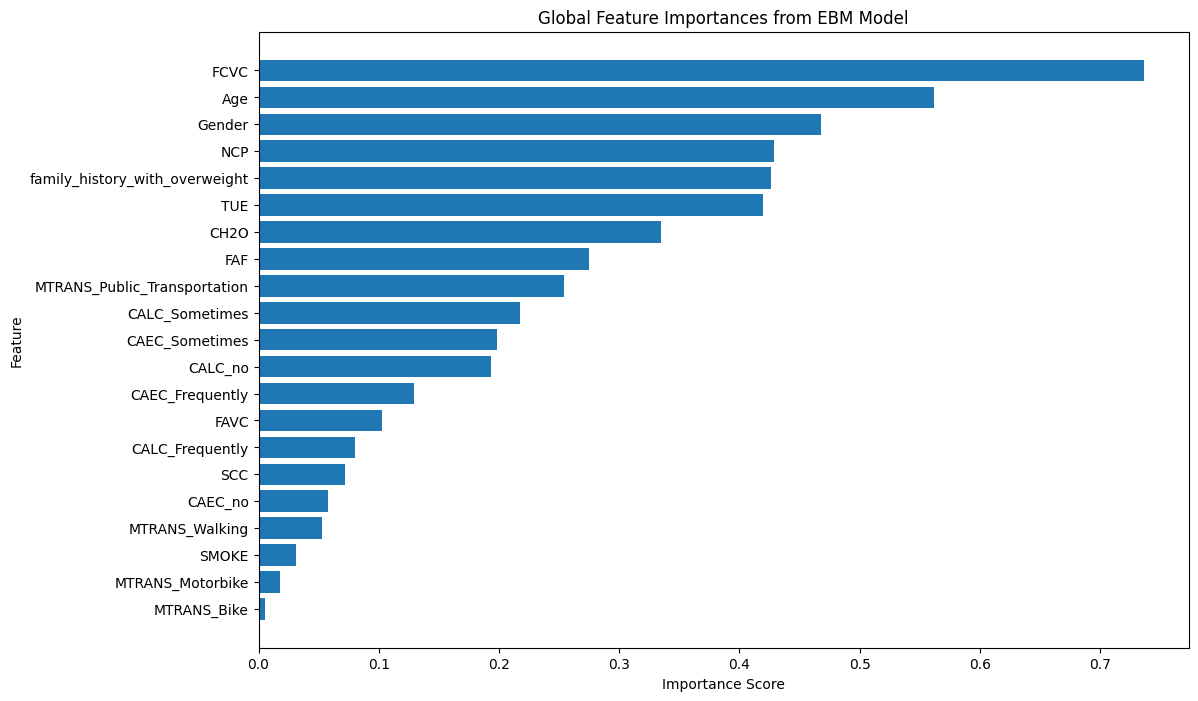

In [ ]:
import matplotlib.pyplot as plt
global_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sort the DataFrame by importance
global_importance_df = global_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(global_importance_df['Feature'], global_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Global Feature Importances from EBM Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
show(global_explanation)

In [ ]:
# Checking local explainations for randoom instances
instance_1 = X_test.iloc[[0]]
instance_1_label = pd.DataFrame([y_test[0]])
instance_2 = X_test.iloc[[100]]
instance_2_label = pd.DataFrame([y_test[100]])
instance_2_label

,0
0,2


In [ ]:
from interpret import show
from interpret import show
# Generate local explanations for specific samples
local_explanation_1 = ebm.explain_local(instance_1, instance_1_label)
local_explanation_2 = ebm.explain_local(instance_2, instance_2_label)
show(local_explanation_1)
show(local_explanation_2)

In [ ]:
# local explanations for the first development instance
instance1_local_importance = local_explanation_1.data(0)

print("\nLocal explanations for the first development instance:")
for feature, score in zip(instance1_local_importance['names'], instance1_local_importance['scores']):
    print(f"{feature}: {score}")

# local explanations for the second development instance
instance2_local_importance = local_explanation_2.data(0)

print("\nLocal explanations for the second development instance:")
for feature, score in zip(instance2_local_importance['names'], instance2_local_importance['scores']):
    print(f"{feature}: {score}")


Local explanations for the first development instance:
Gender: [-0.0127312   1.48889734 -0.31457031 -0.07835225]
Age: [ 0.24328762  0.51004181 -0.4706362   0.80189783]
family_history_with_overweight: [-0.11702992  0.52327531  0.18031047 -0.22027284]
FAVC: [-0.02498978  0.18579781 -0.01621836 -0.0037445 ]
FCVC: [ 0.70613793 -1.6390319   0.18497942 -0.37315971]
NCP: [-0.46930752 -0.8318761  -0.47009186  0.87431917]
SMOKE: [-0.01260264  0.01561172 -0.00255318  0.03243806]
CH2O: [-0.32046665  0.33245308 -0.09085433  0.24469587]
SCC: [-0.02278106  0.11690618 -0.00210963  0.00844773]
FAF: [-0.22470314 -1.34072508  0.33166205 -0.1611492 ]
TUE: [ 0.45444903 -2.520237    0.02672011  0.26095989]
CAEC_Frequently: [-0.05712815 -0.50900234 -0.67828269  1.04420629]
CAEC_Sometimes: [ 0.47041075 -1.0597889  -0.47853471  0.39611847]
CAEC_no: [ 0.01459889  0.05888051 -0.02378971  0.02070494]
CALC_Frequently: [-0.00215025  0.08025916 -0.02721214  0.05566587]
CALC_Sometimes: [ 0.09966006 -1.0246671   0.0

# NEURAL NETWORK

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))



Epoch 1/50
43/43 [==============================] - 3s 8ms/step - loss: 1.2519 - accuracy: 0.5852 - val_loss: 0.8436 - val_accuracy: 0.7101
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.8177 - accuracy: 0.6719 - val_loss: 0.6656 - val_accuracy: 0.6834
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6993 - val_loss: 0.5914 - val_accuracy: 0.7544
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.7467 - val_loss: 0.5473 - val_accuracy: 0.7959
Epoch 5/50
43/43 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.7696 - val_loss: 0.5641 - val_accuracy: 0.7811
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.7837 - val_loss: 0.5700 - val_accuracy: 0.7633
Epoch 7/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.7763 - val_loss: 0.5646 - val_accuracy: 0.7663
Epoch 8/50
43/43 [==

# Counterfactuals from library

In [ ]:
import dice_ml
from dice_ml.utils import helpers
import tensorflow as tf

# Assuming X_train and y_train are already defined and preprocessed

# Define continuous features and outcome name
continuous_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outcome_name = 'target'  # Replace with your actual target column name

# Prepare data for DiCE
# Assuming 'data' is your dataframe containing both features and target
data = dice_ml.Data(dataframe=data, continuous_features=continuous_features, outcome_name=outcome_name)

# Wrap your trained TensorFlow model in a DiCE model
dice_model = dice_ml.Model(model=model, backend='TF2')

# Initialize DiCE
exp = dice_ml.Dice(data, dice_model)

# Query instance: replace with the actual instance you want to explain
query_instance = X_test.iloc[0:1]  # Replace with your actual test instance

# Generate counterfactuals
counterfactuals = exp.generate_counterfactuals(query_instance, total_CFs=5, desired_class="opposite",
                                               features_to_vary=continuous_features)

# Visualize counterfactuals
counterfactuals.visualize_as_dataframe()


In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from alibi.explainers import PartialDependence, plot_pd
import matplotlib.pyplot as plt

# Assuming the previous steps to load and preprocess data are done, and the model is trained as shown in your code

# Define the feature name
feature_name = 'Age'
feature_idx = list(X_test.columns).index(feature_name)

# Wrap the Keras model
def model_predict_proba(data):
    return model.predict(data)

# Initialize the PartialDependence object
pdp = PartialDependence(predictor=model_predict_proba, feature_names=list(X_test.columns))

# Compute PDP and ICE for the feature
pd_results = pdp.explain(X_test.values, features=[feature_idx])


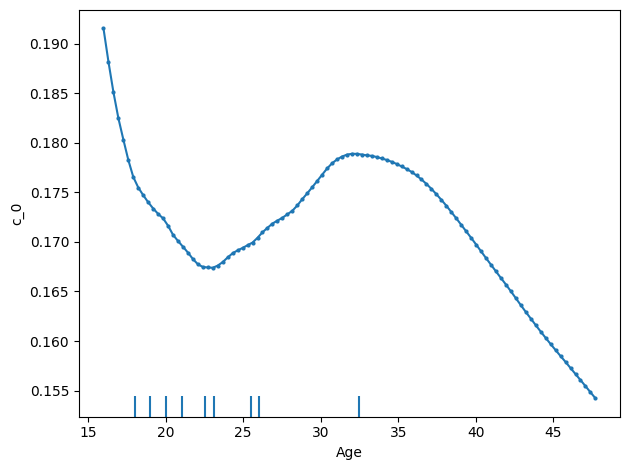

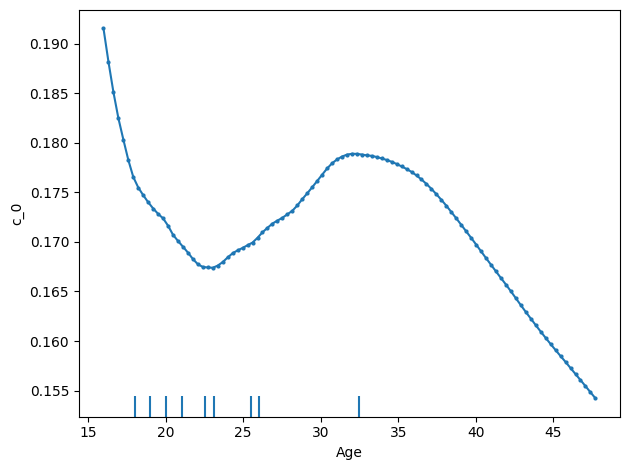

In [ ]:

# Plot PDP
plot_pd(pd_results,n_ice='all')
plt.show()
# print(help(plot_pd))
# Plot ICE
plot_pd(pd_results, n_ice=2)
plt.show()

## Only adults

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)


# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Categorize BMI
'''
classification ranges defined by health organizations such as the World Health
Organization (WHO) and the Centers for Disease Control and Prevention (CDC).

These ranges are:
Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity I: 30 ≤ BMI < 34.9
Obesity II: 35 ≤ BMI < 39.9
Obesity III: BMI ≥ 40

'''
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
data_encoded['BMI_Category'] = pd.cut(data_encoded['BMI'], bins=bmi_bins, labels=bmi_labels)

# Drop the original BMI column
data_encoded = data_encoded.drop(columns=['BMI'])



# Define the features (X) and the target (y)
data_encoded = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])

# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']
X.head()
# Categorize Age
data_encoded['Adult'] = data_encoded['Age'].apply(lambda x: True if x >= 18 else False)
data_encoded =  data_encoded[data_encoded['Adult']]
# Drop the original Age column

data_encoded.drop(columns=['Adult'])
# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']

X.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Adult
0,False,21.0,True,False,2.0,3.0,False,2.0,False,0.0,...,True,False,False,False,True,False,False,True,False,True
1,False,21.0,True,False,3.0,3.0,True,3.0,True,3.0,...,True,False,False,True,False,False,False,True,False,True
2,True,23.0,True,False,2.0,3.0,False,2.0,False,2.0,...,True,False,True,False,False,False,False,True,False,True
3,True,27.0,False,False,3.0,3.0,False,2.0,False,2.0,...,True,False,True,False,False,False,False,False,True,True
4,True,22.0,False,False,2.0,1.0,False,2.0,False,0.0,...,True,False,False,True,False,False,False,True,False,True


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                precision    recall  f1-score   support

Normal weight       0.70      0.48      0.57        63
    Obesity I       0.68      0.86      0.76        63
   Obesity II       0.85      0.74      0.79        68
  Obesity III       0.89      0.89      0.89        61
   Overweight       0.66      0.70      0.68       100
  Underweight       0.71      0.82      0.76        45

     accuracy                           0.74       400
    macro avg       0.75      0.75      0.74       400
 weighted avg       0.74      0.74      0.73       400

Accuracy: 0.7375


{'Normal weight': {'precision': 0.6976744186046512,
  'recall': 0.47619047619047616,
  'f1-score': 0.5660377358490566,
  'support': 63},
 'Obesity I': {'precision': 0.6835443037974683,
  'recall': 0.8571428571428571,
  'f1-score': 0.7605633802816901,
  'support': 63},
 'Obesity II': {'precision': 0.847457627118644,
  'recall': 0.7352941176470589,
  'f1-score': 0.7874015748031497,
  'support': 68},
 'Obesity III': {'precision': 0.8852459016393442,
  'recall': 0.8852459016393442,
  'f1-score': 0.8852459016393442,
  'support': 61},
 'Overweight': {'precision': 0.660377358490566,
  'recall': 0.7,
  'f1-score': 0.6796116504854369,
  'support': 100},
 'Underweight': {'precision': 0.7115384615384616,
  'recall': 0.8222222222222222,
  'f1-score': 0.7628865979381444,
  'support': 45},
 'accuracy': 0.7375,
 'macro avg': {'precision': 0.7476396785315226,
  'recall': 0.7460159291403263,
  'f1-score': 0.7402911401661371,
  'support': 400},
 'weighted avg': {'precision': 0.7417521619342218,
  'recal

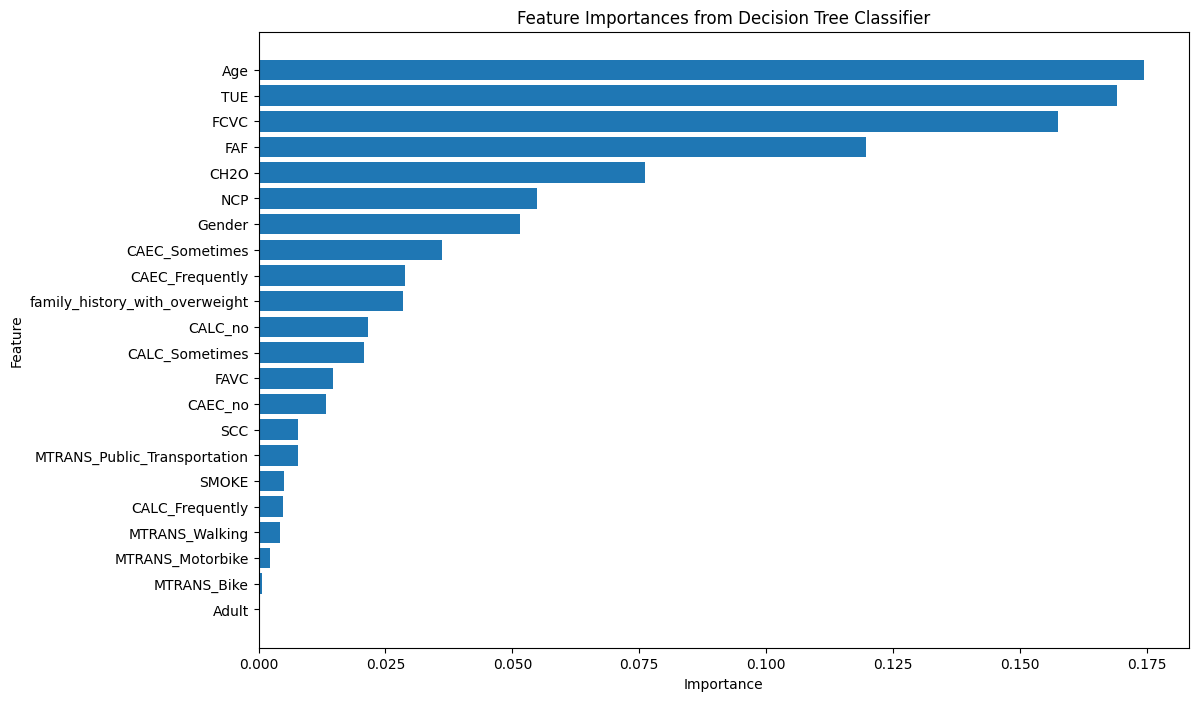

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()